<a href="https://colab.research.google.com/github/mKozik7/Data_Analytics/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import random

[[18.0 8 307.0 ... 70 1 'chevrolet chevelle malibu']
 [15.0 8 350.0 ... 70 1 'buick skylark 320']
 [18.0 8 318.0 ... 70 1 'plymouth satellite']
 ...
 [32.0 4 135.0 ... 82 1 'dodge rampage']
 [28.0 4 120.0 ... 82 1 'ford ranger']
 [31.0 4 119.0 ... 82 1 'chevy s-10']]


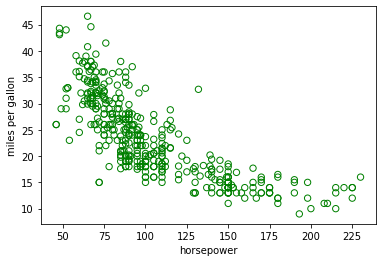

In [26]:
filename = "Auto.csv"
df = pd.read_csv(filename)
moddf = df.dropna()
v = moddf.values
#  v is an array 
plt.xlabel('horsepower')
plt.ylabel('miles per gallon')
plt.scatter(v[:,3], v[:,0],s=40,facecolors='none', edgecolors='g')
plt.savefig('scatterAuto.eps', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
ytrain = v[:,0]
xtrain = v[:,3].reshape((-1,1))
xtrain_ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(xtrain) ##defining the model, degree 1 line, degree 2 parabola, include_bias = we are enforcing beta0 is not 0
model = LinearRegression().fit(xtrain_, ytrain)   ## 
beta0 = model.intercept_
beta1 = model.coef_[0]
print(beta1)

-0.15784473335365365


In [33]:
N=392 
beta0_list = []
beta1_list =[]     
np.random.seed(3)
for i in range(1000):
  sample_row = np.random.choice(a=N,size=N)
  xtrain_sample = v[sample_row, 3]
  ytrain_sample = v[sample_row,0]
  xtrain_sample_ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(xtrain_sample.reshape((-1,1))) ##defining the model, degree 1 line, degree 2 parabola, include_bias = we are enforcing beta0 is not 0
  model = LinearRegression().fit(xtrain_sample_, ytrain_sample)   ## 
  beta0 = model.intercept_
  beta1 = model.coef_[0]
  beta0_list.append(beta0)
  beta1_list.append(beta1)


In [37]:
std_beta0 = np.std(beta0_list)
std_beta1 = np.std(beta1_list)

average_beta0 = sum(beta0_list) / len(beta0_list)
average_beta1 = sum(beta1_list) / len(beta1_list)
print(std_beta0)
print(std_beta1)


0.8561053514456579
0.0073366160554988935


In [39]:
print(f'Original beta0 {beta0} after bootstrapping {average_beta0}')
print(f'Original beta0 {beta1} after bootstrapping {average_beta1}')

Original beta0 39.93586102117047 after bootstrapping 40.000192421491086
Original beta0 -0.15784473335365365 after bootstrapping -0.15853297121740328
